# Census Income Project

### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#importing feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

#importing train-test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#importing metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#importing Machine Learning models
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading & Reading the dataset

In [2]:
cencus=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
cencus

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We have loaded the dataset using read_csv.

In [3]:
# Lets check the top 5 rows and bottom 5 rows of the dataset.
cencus.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
cencus.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### Our target variable in this case is column 'Income'.

In [5]:
# Lets check random rows of our dataset to get clear idea about the dataset.
cencus.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
23934,44,Private,228124,HS-grad,9,Married-spouse-absent,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
11705,38,Private,304651,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,>50K
16934,25,Private,69739,10th,6,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
2452,24,Self-emp-not-inc,174391,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,<=50K
596,42,Self-emp-not-inc,214242,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,50,United-States,>50K
4876,47,Federal-gov,99549,Some-college,10,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
32277,55,Private,89182,12th,8,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,40,Italy,<=50K
6257,27,Private,704108,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K
177,18,Private,183930,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,12,United-States,<=50K
12092,24,?,151153,Some-college,10,Never-married,?,Not-in-family,Asian-Pac-Islander,Male,99999,0,50,South,>50K


- As per above sample function we have checked randomly 10 data of our dataset & we came to know that some values are filled as '?' in some columns.

- We will work on it in EDA.

# Exploratory Data Analysis (EDA)

In [6]:
cencus.shape

(32560, 15)

- We can see that our dataset is having 32560 rows and 15 columns.

In [7]:
cencus.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

- We can see above 15 columns of our dataset.

- Out of which "Income" is our target variable and remaining 14 columns are our feature columns.

In [8]:
cencus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Above informations tells us that our dataset is having 6 integer datatypes and 9 object datatypes.

##### Our main aim of building a model is that we need to predict and determine whether a person makes over $50K a year or not.

##### So lets check number of data which contains income (>=50k) and (<=50k) or (=50k)

In [9]:
# Total number of data(rows) in our dataset
n_rec = cencus.shape[0]

# Total number of features(columns) in the dataset
n_features = cencus.shape[1]

# Number of data where individual's income is more than $50,000
n_greater_50k = cencus[cencus['Income'] == ' <=50K'].shape[0]

# Number of data where individual's income is at most $50,000
n_atmost_50k = cencus[cencus['Income'] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_rec) * 100

# Print the results
print("Total number of data recorded: {}".format(n_rec))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_atmost_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of data recorded: 32560
Total number of features: 15
Individuals making more than $50k: 24719
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


### As per above observation we came to know that 75.92% people are making salary more than $50k.

# Lets divide our datatypes into object datatype and numerical datatype,so that it will be easy for us to identify and work on it, 

In [10]:
object_datatype = []
for i in cencus.dtypes.index:
    if cencus.dtypes[i] == 'object':
        object_datatype.append(i)
print(f"Object Data Type Columns are: ", object_datatype)

Object Data Type Columns are:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [11]:
numerical_datatype = []
for i in cencus.dtypes.index:
    if cencus.dtypes[i] != 'object':
        numerical_datatype.append(i)
print(f"Numerical Data Type Columns are: ", numerical_datatype)

Numerical Data Type Columns are:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


- As per above function we came to know that below columns are object datatype.

'Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income'

- Numerical datatype are as follows:
    
'Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week'

In [12]:
for columns in object_datatype:
    print(columns)
    print(cencus[columns].value_counts())
    print("="*120)

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       41

- As per above observations we came to know that '?' is present in columns "Occupation","Workclass","Native_country".

- Let us fill this '?' with data.

In [13]:
cencus['Workclass'].replace({' ?':' Other'},inplace=True)
cencus['Occupation'].replace({' ?':' Other'},inplace=True)
cencus['Native_country'].replace({' ?':' Other'},inplace=True)

In [14]:
cencus.sample(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
28011,35,Private,82552,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K
206,35,Private,36270,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,60,United-States,<=50K
21498,34,Private,174789,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,United-States,<=50K
2016,57,Federal-gov,370890,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,2258,40,United-States,<=50K
14973,35,Private,155961,HS-grad,9,Never-married,Other-service,Own-child,Black,Female,0,0,35,Jamaica,<=50K
11039,46,Self-emp-not-inc,43348,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,55,United-States,>50K
23524,41,Private,215479,Some-college,10,Never-married,Transport-moving,Not-in-family,Black,Male,0,0,43,United-States,<=50K
15367,28,Self-emp-not-inc,315417,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,2176,0,40,United-States,<=50K
9175,20,Private,188612,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,38,Nicaragua,<=50K
2635,21,State-gov,341410,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,15,United-States,<=50K


- Now no column is reflect "?" as its data.

In [15]:
# Lets check number of unique values of each columns:
cencus.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [16]:
# Let us check the unique values of our target variable:
cencus['Income'].unique

<bound method Series.unique of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object>

- There are only 2 unique values in our target variable "Income" i.e <=50k and >50k

In [17]:
# Lets check if there are ay duplicate values in our dataset
cencus.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Length: 32560, dtype: bool

In [18]:
# checking duplicates and removing it
print("Before removing duplicates:", cencus.duplicated().sum())

cencus = cencus[~cencus.duplicated()]

print("After removing duplicates:", cencus.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [19]:
#Exploring the data of target variable:
cencus.Income.value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

- We can understand that 24697 rows has income as <=50k and 7839 rows has income as >50k.

# Checking unique values of object dtype columns:

In [20]:
cencus['Workclass'].unique

<bound method Series.unique of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32536, dtype: object>

In [21]:
cencus['Education'].unique

<bound method Series.unique of 0          Bachelors
1            HS-grad
2               11th
3          Bachelors
4            Masters
            ...     
32555     Assoc-acdm
32556        HS-grad
32557        HS-grad
32558        HS-grad
32559        HS-grad
Name: Education, Length: 32536, dtype: object>

In [22]:
cencus['Marital_status'].unique

<bound method Series.unique of 0         Married-civ-spouse
1                   Divorced
2         Married-civ-spouse
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32555     Married-civ-spouse
32556     Married-civ-spouse
32557                Widowed
32558          Never-married
32559     Married-civ-spouse
Name: Marital_status, Length: 32536, dtype: object>

In [23]:
cencus['Occupation'].unique

<bound method Series.unique of 0           Exec-managerial
1         Handlers-cleaners
2         Handlers-cleaners
3            Prof-specialty
4           Exec-managerial
                ...        
32555          Tech-support
32556     Machine-op-inspct
32557          Adm-clerical
32558          Adm-clerical
32559       Exec-managerial
Name: Occupation, Length: 32536, dtype: object>

In [24]:
cencus['Relationship'].unique

<bound method Series.unique of 0               Husband
1         Not-in-family
2               Husband
3                  Wife
4                  Wife
              ...      
32555              Wife
32556           Husband
32557         Unmarried
32558         Own-child
32559              Wife
Name: Relationship, Length: 32536, dtype: object>

In [25]:
cencus['Race'].unique

<bound method Series.unique of 0         White
1         White
2         Black
3         Black
4         White
          ...  
32555     White
32556     White
32557     White
32558     White
32559     White
Name: Race, Length: 32536, dtype: object>

In [26]:
cencus['Sex'].unique

<bound method Series.unique of 0           Male
1           Male
2           Male
3         Female
4         Female
          ...   
32555     Female
32556       Male
32557     Female
32558       Male
32559     Female
Name: Sex, Length: 32536, dtype: object>

In [27]:
cencus['Native_country'].unique

<bound method Series.unique of 0         United-States
1         United-States
2         United-States
3                  Cuba
4         United-States
              ...      
32555     United-States
32556     United-States
32557     United-States
32558     United-States
32559     United-States
Name: Native_country, Length: 32536, dtype: object>

# Checking unique values of numerical dtype columns:

In [28]:
cencus['Age'].unique

<bound method Series.unique of 0        50
1        38
2        53
3        28
4        37
         ..
32555    27
32556    40
32557    58
32558    22
32559    52
Name: Age, Length: 32536, dtype: int64>

In [29]:
cencus['Education_num'].unique

<bound method Series.unique of 0        13
1         9
2         7
3        13
4        14
         ..
32555    12
32556     9
32557     9
32558     9
32559     9
Name: Education_num, Length: 32536, dtype: int64>

In [30]:
cencus['Fnlwgt'].unique

<bound method Series.unique of 0         83311
1        215646
2        234721
3        338409
4        284582
          ...  
32555    257302
32556    154374
32557    151910
32558    201490
32559    287927
Name: Fnlwgt, Length: 32536, dtype: int64>

In [31]:
cencus['Capital_gain'].unique

<bound method Series.unique of 0            0
1            0
2            0
3            0
4            0
         ...  
32555        0
32556        0
32557        0
32558        0
32559    15024
Name: Capital_gain, Length: 32536, dtype: int64>

In [32]:
cencus['Capital_loss'].unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    0
32557    0
32558    0
32559    0
Name: Capital_loss, Length: 32536, dtype: int64>

In [33]:
cencus['Hours_per_week'].unique

<bound method Series.unique of 0        13
1        40
2        40
3        40
4        40
         ..
32555    38
32556    40
32557    40
32558    20
32559    40
Name: Hours_per_week, Length: 32536, dtype: int64>

# Checking null values in our dataset

In [34]:
# checking null values:
cencus.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- We can see that there is no missing or null value in our dataset.

In [35]:
# checking values having NAN:
cencus.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- We can see that no column is having NAN values in it.

# Statistical Data:

In [36]:
cencus.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


- As per above observations we can see that count of each column is 32536.
- There is huge difference in mean values and 50% for column 'Capital_gain' and 'Capital_loss'
- Similar in case of 75% and maximum values for column "Capital_gain" and 'Capital_loss'
- min,25%,50%,75% values are 0 for columns 'Capital_gain' and 'Capital_loss'

# Checking Skewness:

In [37]:
cencus.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

<AxesSubplot:>

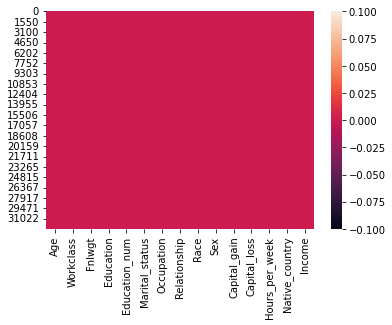

In [38]:
#Lets check & visualize the dataset using heatmap 
sns.heatmap(cencus.isnull())

- By visualizing the dataset using heatmap, we are now sure that our dataset is not having any missing or null values.

# VISUALIZATION OF DATA

### Countplot:

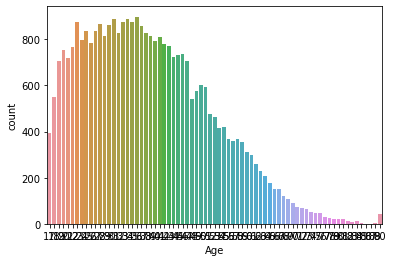

In [39]:
ax = sns.countplot(cencus['Age'])

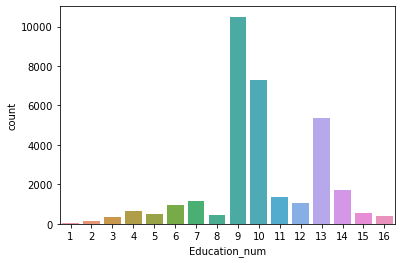

In [40]:
cx = sns.countplot(cencus['Education_num'])

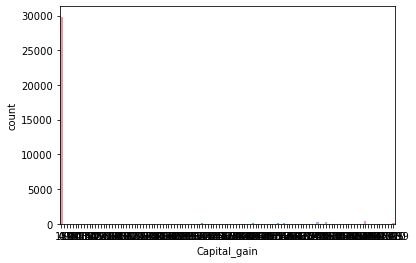

In [41]:
dx = sns.countplot(cencus['Capital_gain'])

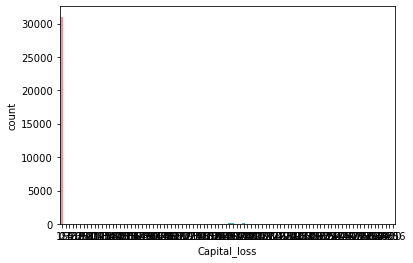

In [42]:
ex = sns.countplot(cencus['Capital_loss'])

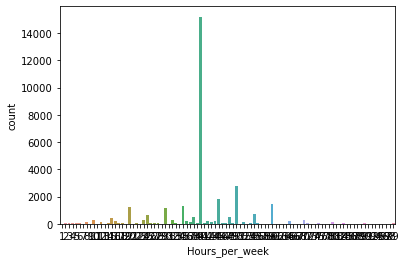

In [43]:
fx = sns.countplot(cencus['Hours_per_week'])

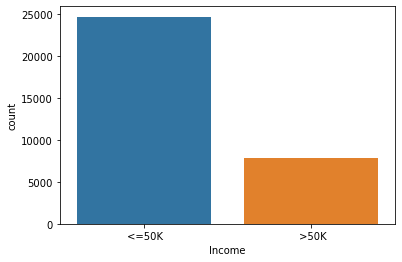

In [44]:
gx = sns.countplot(cencus['Income'])

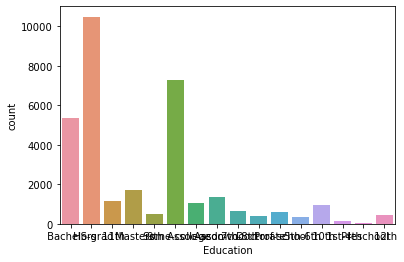

In [45]:
hx = sns.countplot(cencus['Education'])

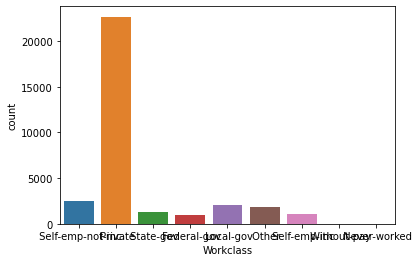

In [46]:
ix = sns.countplot(cencus['Workclass'])

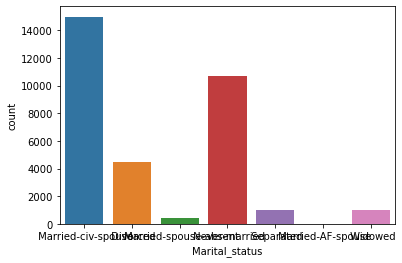

In [47]:
jx = sns.countplot(cencus['Marital_status'])

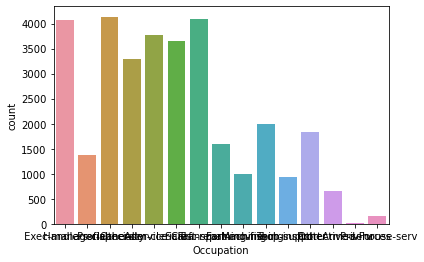

In [48]:
kx = sns.countplot(cencus['Occupation'])

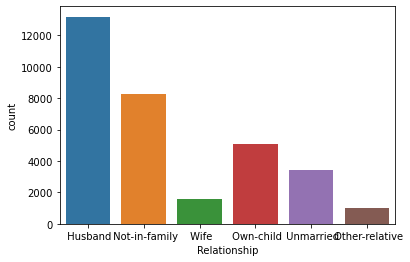

In [49]:
lx = sns.countplot(cencus['Relationship'])

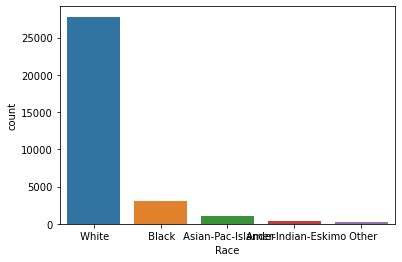

In [50]:
mx = sns.countplot(cencus['Race'])

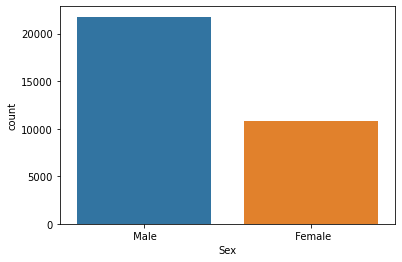

In [51]:
nx = sns.countplot(cencus['Sex'])

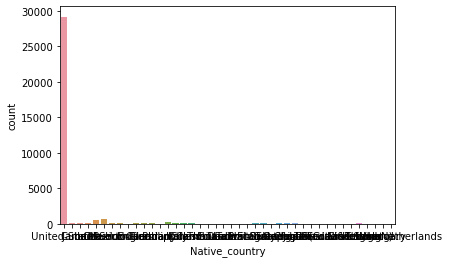

In [52]:
px = sns.countplot(cencus['Native_country'])

##### Conclusion of countplot:
1. High number of people are in range of 20-40 age group.
2. In case of "education number" - 9 is at highest.
3. In case of 'capital gain' & 'capital loss' 0 is at highest.
4. In case of 'Hours per week' 30-50 range is at highest.
5. In case of 'Income' people with salary <=50k is at highest number.
6. In case of 'Education' HS-grad has highest count.
7. In case of 'Workclass' private job employees has highest count.
8. 'Marital status' of most of the people is Married.
9. Most of the people have 'relationship' as husband.
10. White 'Race' people are more in number.
11. Male employees are at highest number as compared to female.
12. Most of the people have 'Native country' as US.

### Let us check income v/s Education class heatmap:

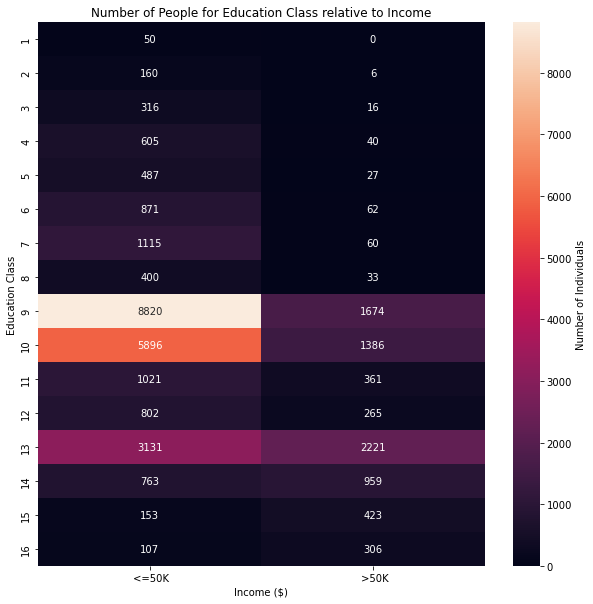

In [53]:
plt.figure(figsize=[10,10])
 
counts = cencus.groupby(['Education_num', 'Income']).size()
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'Education_num', columns = 'Income', values = 'count').fillna(0)

sns.heatmap(counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

- As per above heatmap we are able to visualise that individuals with education class 9,10,13 are highest in number who has income <=50k.

- Education number 9 is at highest number with individuals count as 8820,followed by 10 with 5896 and 13 with 3131.

### Let us check income v/s Sex heatmap

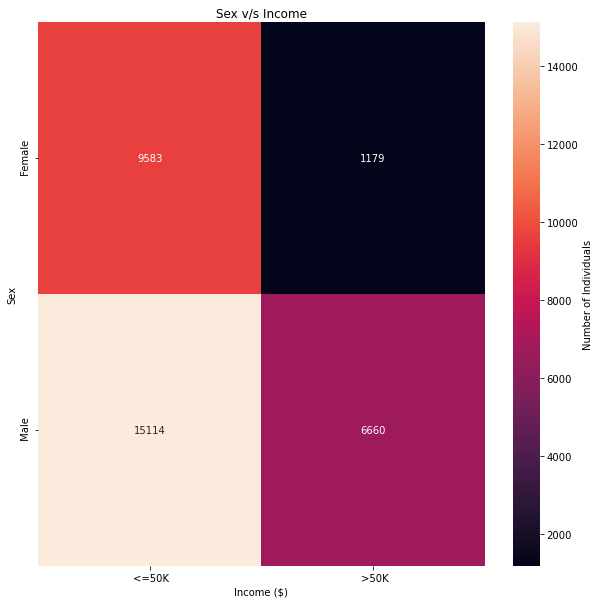

In [54]:
plt.figure(figsize=[10,10])
 
sex_counts = cencus.groupby(['Sex', 'Income']).size()
sex_counts = sex_counts.reset_index(name = 'sex_count')
sex_counts = sex_counts.pivot(index = 'Sex', columns = 'Income', values = 'sex_count').fillna(0)

sns.heatmap(sex_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Sex v/s Income')
plt.xlabel('Income ($)')
plt.ylabel('Sex');

- As per above heatmap we are ablt to visualise that male category are high in number with income more than 50k.

### Let us check income v/s Occupation background heatmap

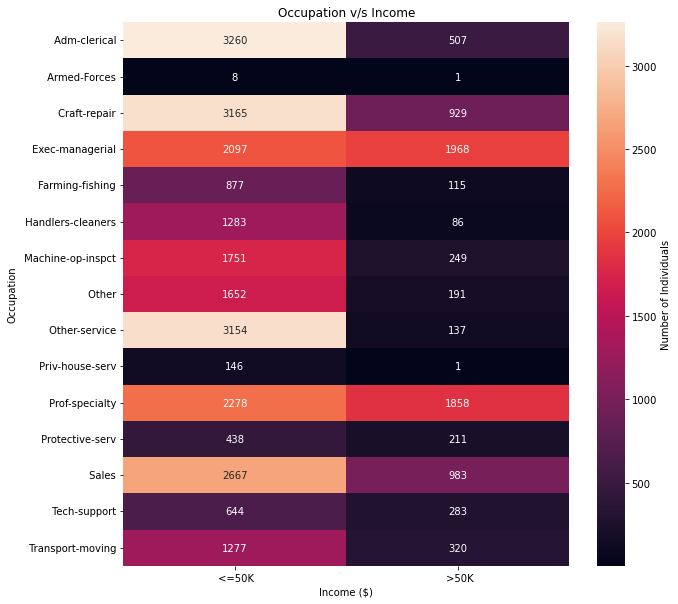

In [55]:
plt.figure(figsize=[10,10])
 
occ_counts = cencus.groupby(['Occupation', 'Income']).size()
occ_counts = occ_counts.reset_index(name = 'occupation_count')
occ_counts = occ_counts.pivot(index = 'Occupation', columns = 'Income', values = 'occupation_count').fillna(0)

sns.heatmap(occ_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Occupation v/s Income')
plt.xlabel('Income ($)')
plt.ylabel('Occupation');

- As per above heatmap we are able to visualise that people with occupation background "Adm-clerical" & "Craft-repair" are highest in number with income greater than 50k.

### Let us check income v/s Workclass heatmap

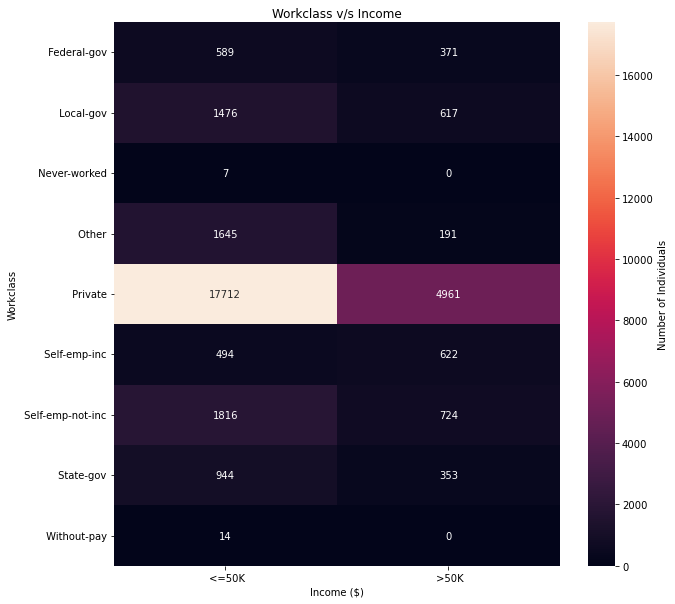

In [56]:
plt.figure(figsize=[10,10])
 
work_counts = cencus.groupby(['Workclass', 'Income']).size()
work_counts = work_counts.reset_index(name = 'work_count')
work_counts = work_counts.pivot(index = 'Workclass', columns = 'Income', values = 'work_count').fillna(0)

sns.heatmap(work_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Workclass v/s Income')
plt.xlabel('Income ($)')
plt.ylabel('Workclass');

- We are able to visualise that private job seekers with highest count of 17712 have income greater than 50k.

### Let us check income v/s age heatmap

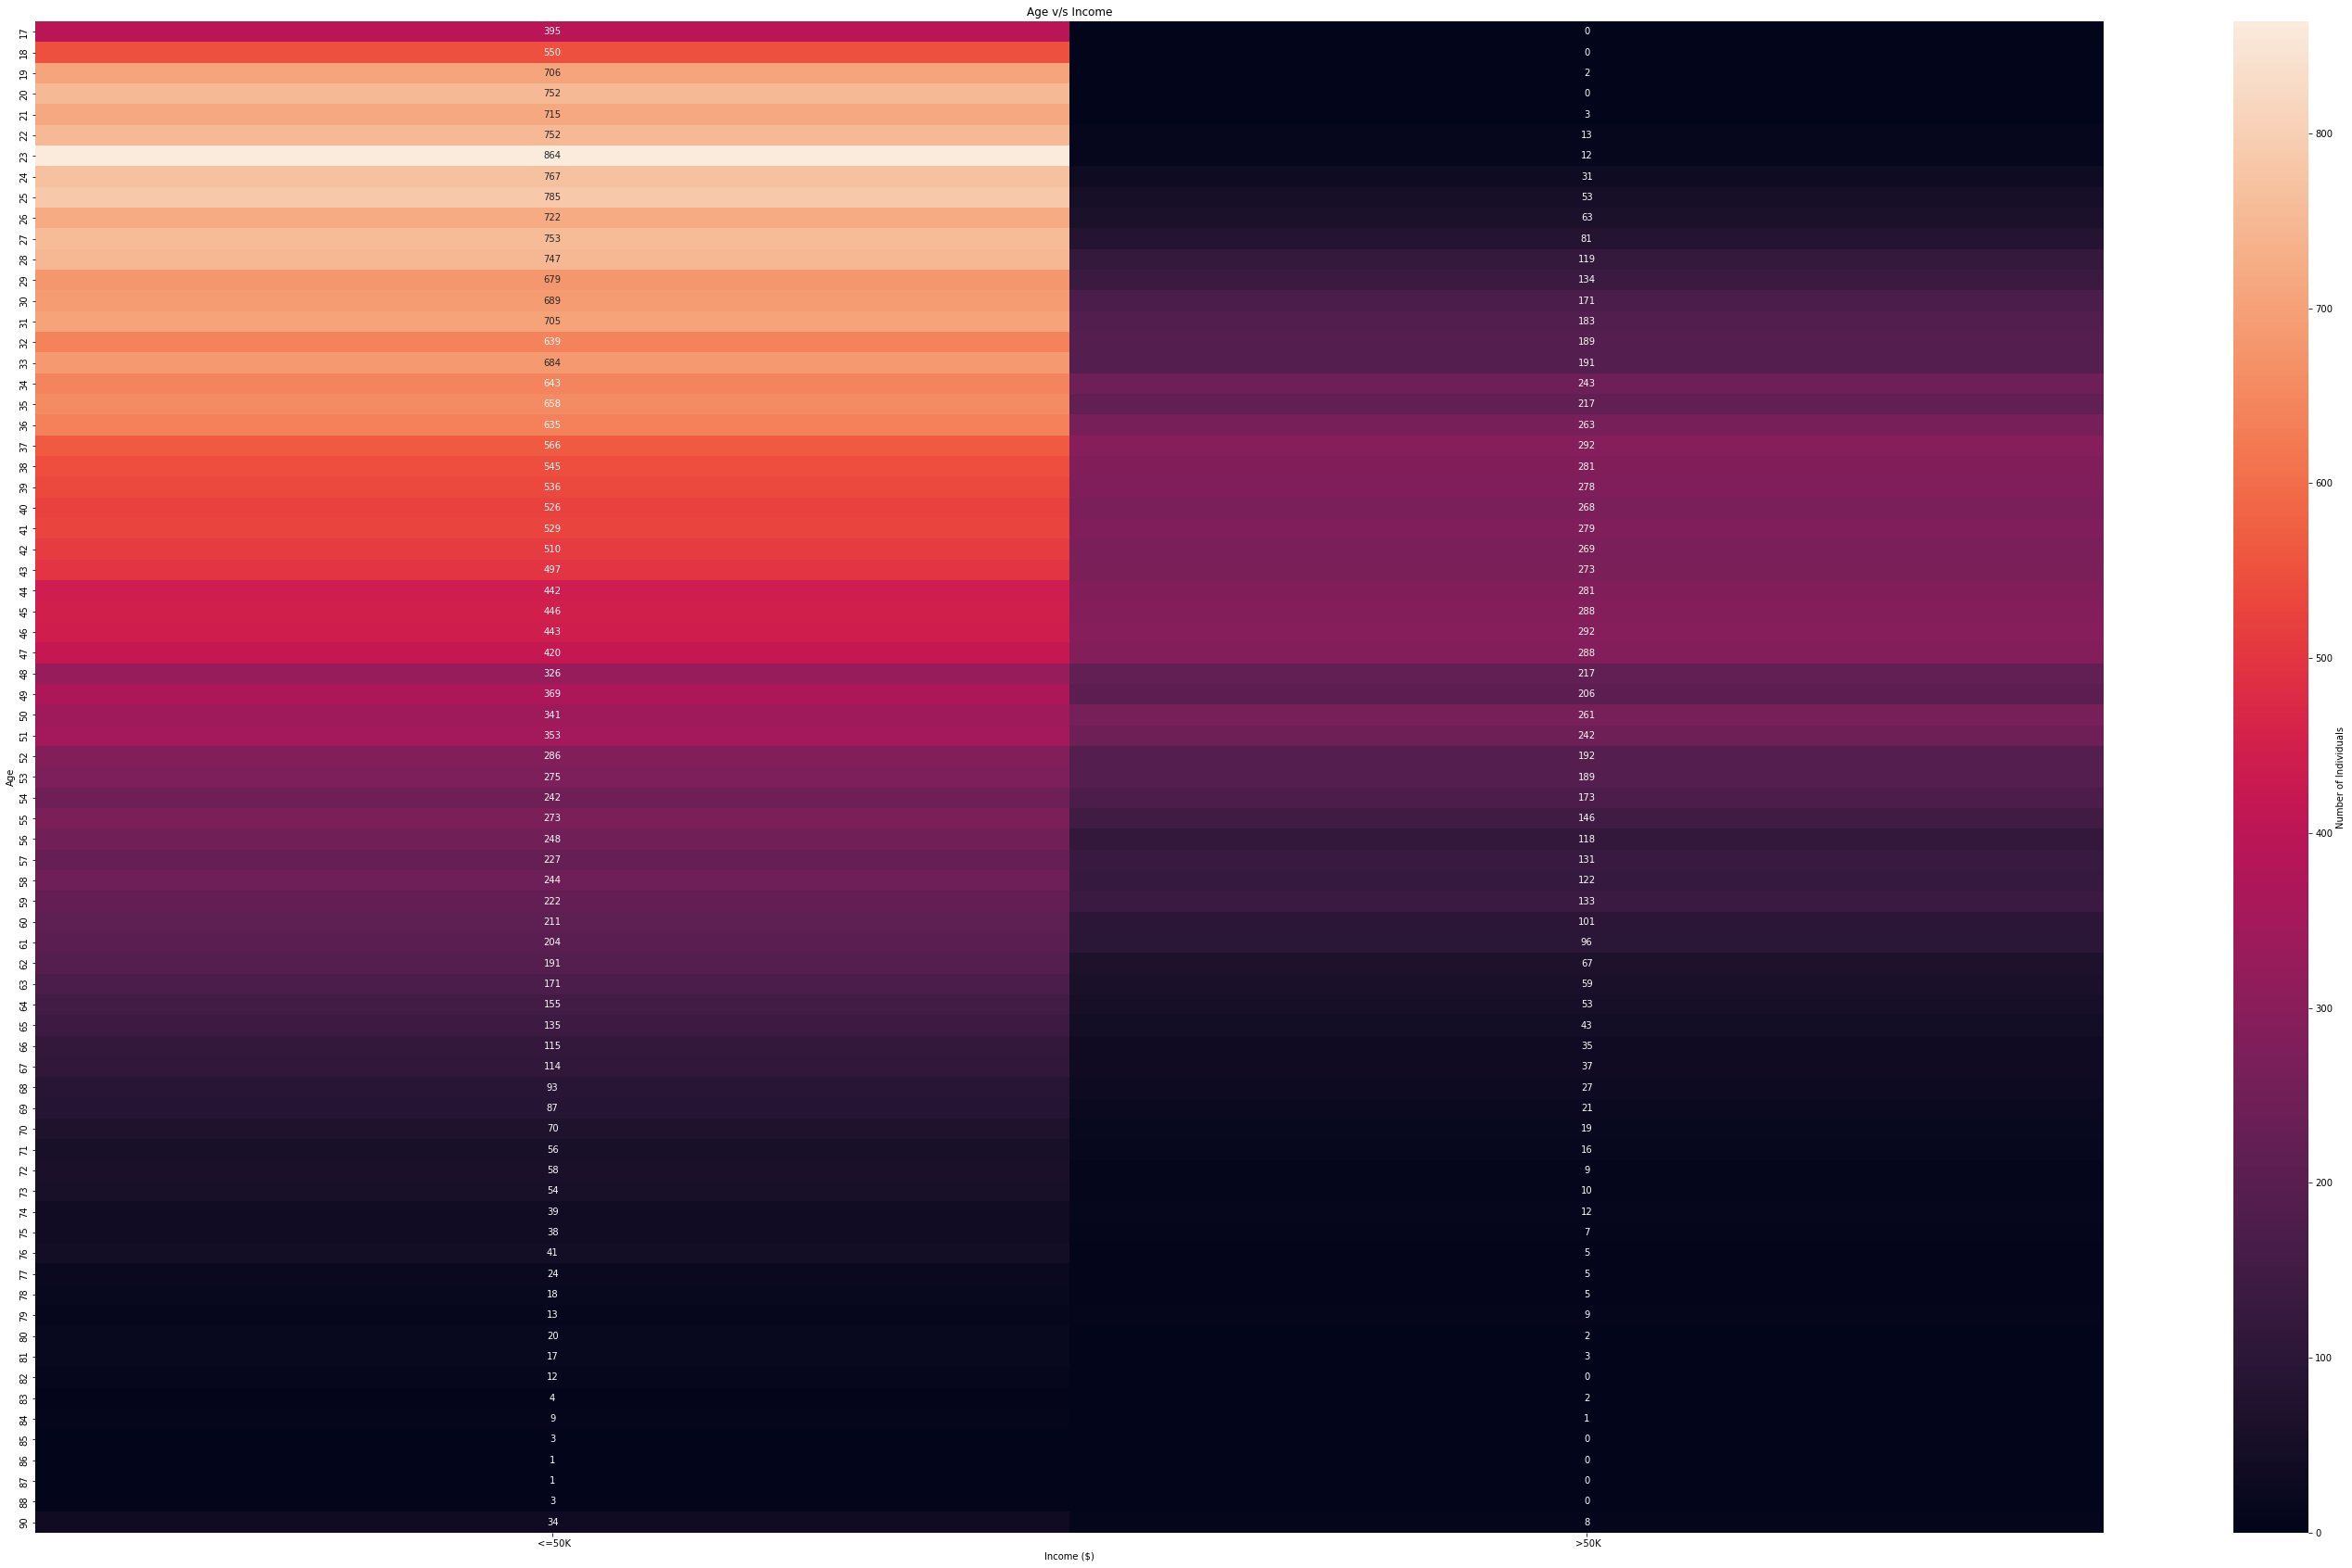

In [57]:
plt.figure(figsize=[50,30])
 
age_counts = cencus.groupby(['Age', 'Income']).size()
age_counts = age_counts.reset_index(name = 'Age_count')
age_counts = age_counts.pivot(index = 'Age', columns = 'Income', values = 'Age_count').fillna(0)

sns.heatmap(age_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Age v/s Income')
plt.xlabel('Income ($)')
plt.ylabel('Age');

- We are able to visualise that people with age group 40-50 are high in number with income greater than 50k.

##### In this way we have checked and visualised the relationship between Income i.e target variable and few fetures.

# Barplot

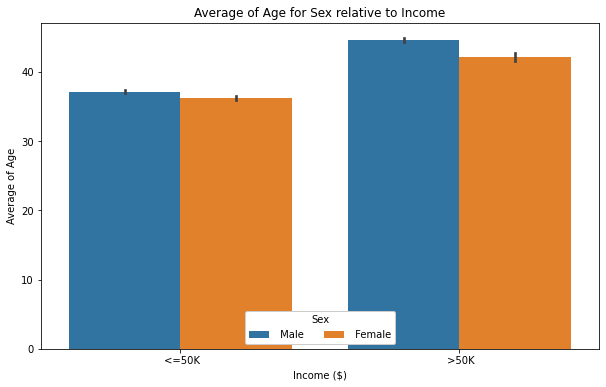

In [58]:
plt.figure(figsize=[10,6])
ax = sns.barplot(data = cencus, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

- Average male age 45 are the highest people who has income greater than 50k. 

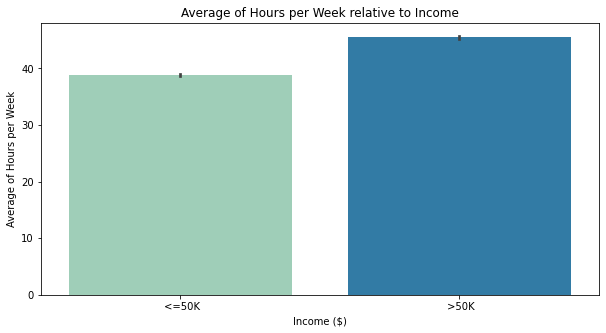

In [59]:
plt.figure(figsize=[10,5])
sns.barplot(data=cencus, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

- Individual whose income is greater than 50k works on an average of 38hrs/week whereas individuals with income less than 50k work more on an average of 50hrs/week. 

# Stripplot

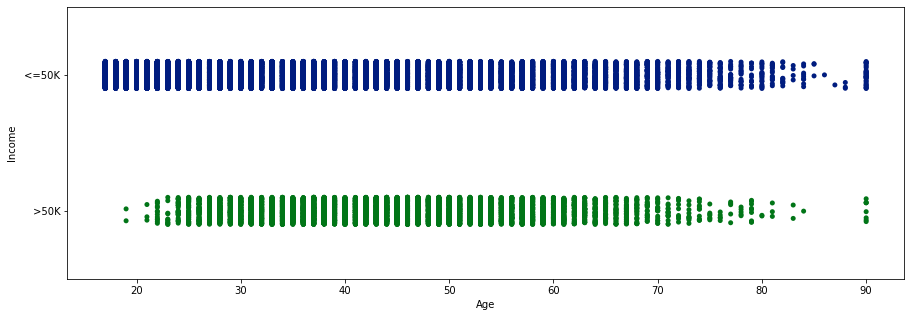

In [60]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,5))
sns.stripplot(x = 'Age', y = 'Income', data=cencus)
plt.show()

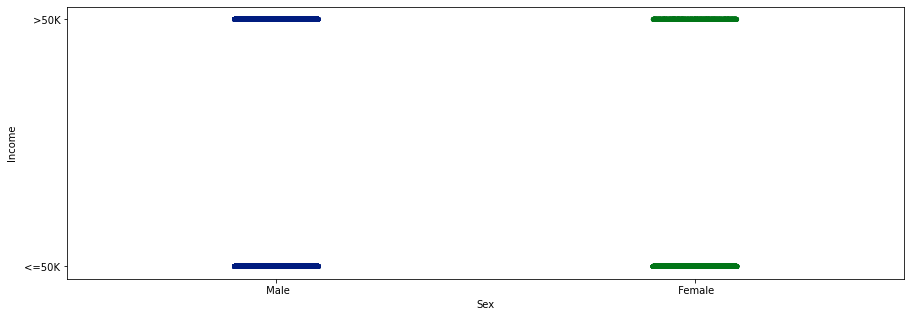

In [61]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,5))
sns.stripplot(x = 'Sex', y = 'Income', data=cencus)
plt.show()

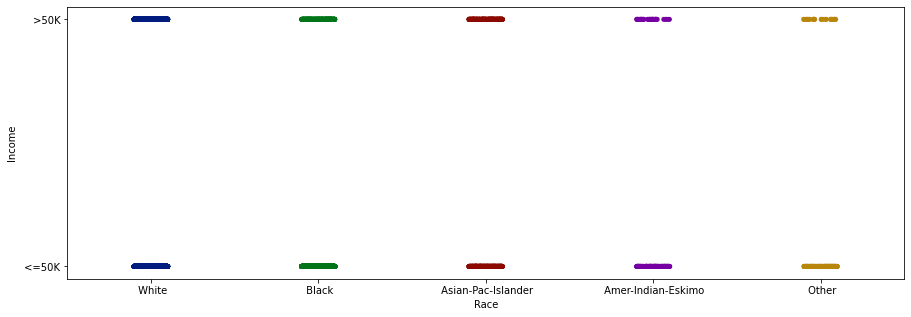

In [62]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,5))
sns.stripplot(x = 'Race', y = 'Income', data=cencus)
plt.show()

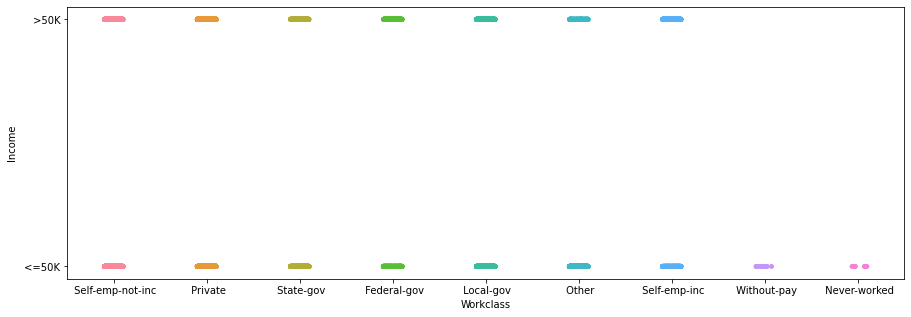

In [63]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,5))
sns.stripplot(x = 'Workclass', y = 'Income', data=cencus)
plt.show()

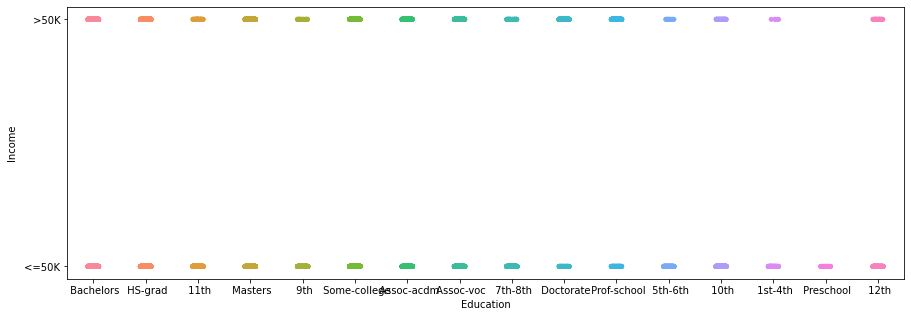

In [64]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,5))
sns.stripplot(x = 'Education', y = 'Income', data=cencus)
plt.show()

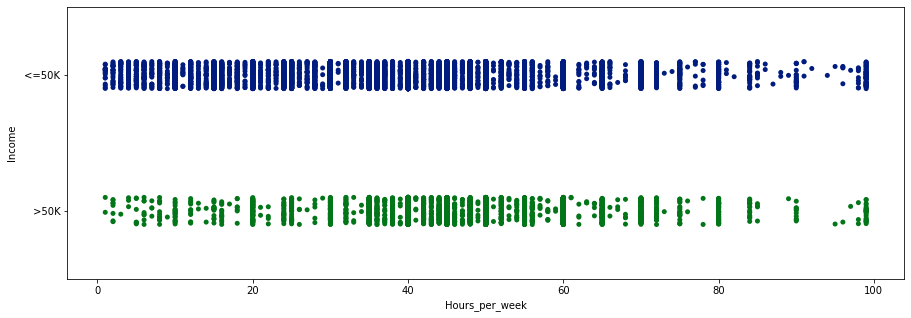

In [65]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,5))
sns.stripplot(x = 'Hours_per_week', y = 'Income', data=cencus)
plt.show()

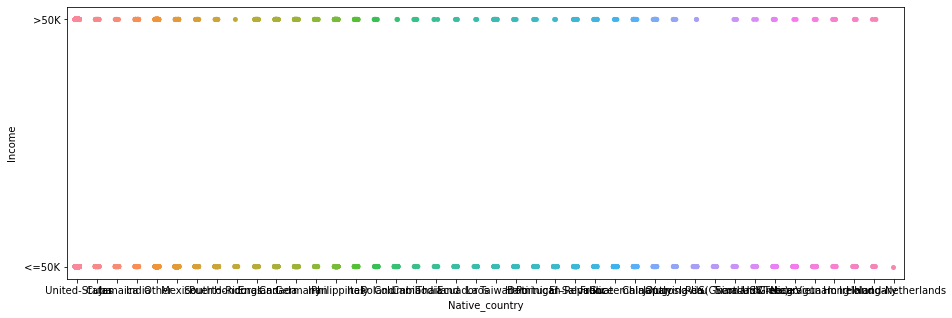

In [66]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,5))
sns.stripplot(x = 'Native_country', y = 'Income', data=cencus)
plt.show()

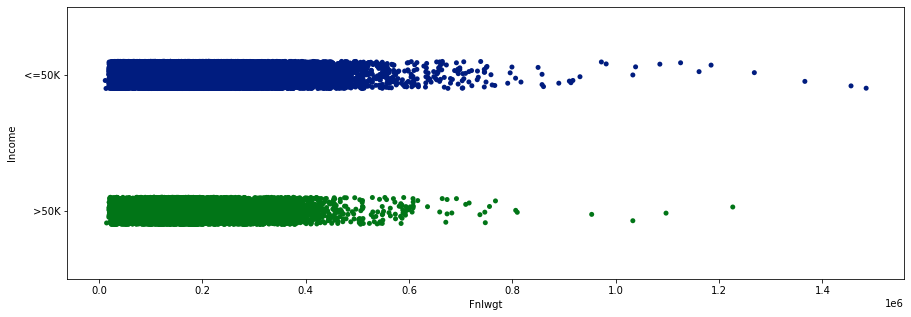

In [67]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(15,5))
sns.stripplot(x = 'Fnlwgt', y = 'Income', data=cencus)
plt.show()

# Violinplot

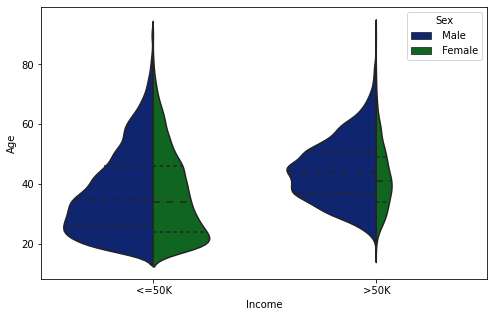

In [68]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=cencus, 
               split=True, scale="count", inner="quartile")
plt.show()

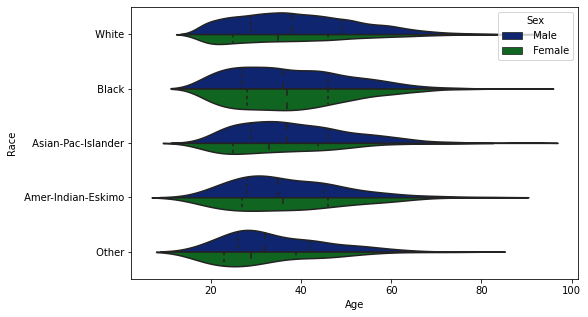

In [69]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Age", y="Race", hue="Sex", data=cencus, 
               split=True, scale="count", inner="quartile")
plt.show()

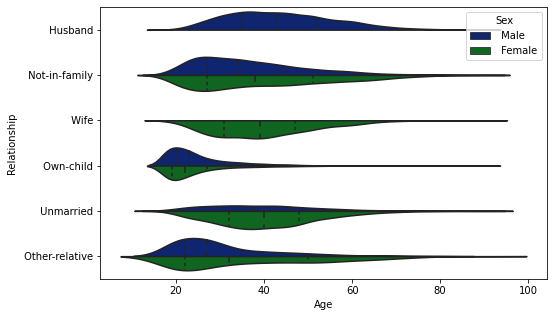

In [70]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Age", y="Relationship", hue="Sex", data=cencus, 
               split=True, scale="count", inner="quartile")
plt.show()

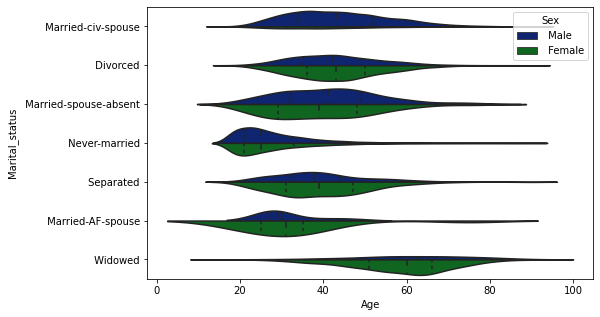

In [71]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Age", y="Marital_status", hue="Sex", data=cencus, 
               split=True, scale="count", inner="quartile")
plt.show()

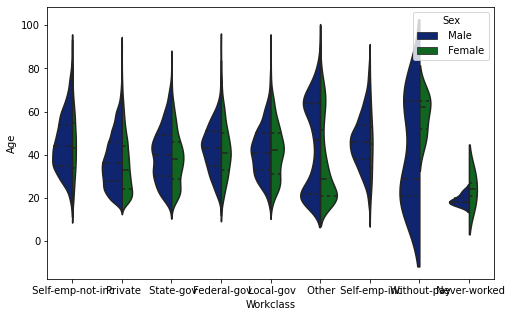

In [72]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Workclass", y="Age", hue="Sex", data=cencus, 
               split=True, scale="count", inner="quartile")
plt.show()

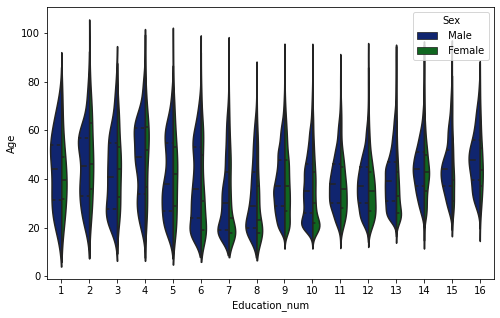

In [73]:
plt.figure(figsize=(8,5))
sns.violinplot(x="Education_num", y="Age", hue="Sex", data=cencus, 
               split=True, scale="count", inner="quartile")
plt.show()

# Scaling using MinMax Scaler

In [74]:
#importing MinMaxScaler from sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler

#creating numerical data list.
numerical = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Fnlwgt', 'Education_num']

cencus_scaler = cencus.copy()

#using Minmaxscaler for scaling the numeric data.
scaler = MinMaxScaler()
cencus_scaler[numerical] = scaler.fit_transform(cencus_scaler[numerical])

In [75]:
cencus_scaler.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
15707,0.438356,Self-emp-inc,0.055909,Doctorate,1.000000,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0.0,0.000000,0.602041,United-States,>50K
27337,0.260274,Private,0.046494,HS-grad,0.533333,Married-civ-spouse,Other-service,Wife,Asian-Pac-Islander,Female,0.0,0.000000,0.397959,South,<=50K
16605,0.082192,Private,0.111926,11th,0.400000,Never-married,Adm-clerical,Unmarried,Black,Male,0.0,0.000000,0.346939,United-States,<=50K
1991,0.410959,Private,0.238473,Some-college,0.600000,Never-married,Sales,Not-in-family,White,Male,0.0,0.000000,0.704082,United-States,>50K
3551,0.534247,Private,0.122644,Masters,0.866667,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.453857,0.438776,United-States,>50K


# Encoding the categorical object datatype columns

In [76]:
# Lets use LabelEncoder

le = LabelEncoder()
cencus["Income"] = le.fit_transform(cencus["Income"])
cencus.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


- Target variable "Income" is converted to numeric value by using LabelEncoder.

In [77]:
# Lets use OrdinalEncoder to Encode the feature columns

oe = OrdinalEncoder()
cencus['Workclass'] = oe.fit_transform(cencus['Workclass'].values.reshape(-1,1))
cencus['Education'] = oe.fit_transform(cencus['Education'].values.reshape(-1,1))
cencus['Marital_status'] = oe.fit_transform(cencus['Marital_status'].values.reshape(-1,1))
cencus['Occupation'] = oe.fit_transform(cencus['Occupation'].values.reshape(-1,1))
cencus['Relationship'] = oe.fit_transform(cencus['Relationship'].values.reshape(-1,1))
cencus['Native_country'] = oe.fit_transform(cencus['Native_country'].values.reshape(-1,1))
cencus['Race'] = oe.fit_transform(cencus['Race'].values.reshape(-1,1))
cencus['Sex'] = oe.fit_transform(cencus['Sex'].values.reshape(-1,1))
cencus.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,39.0,0
1,38,4.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,39.0,0
2,53,4.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,39.0,0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,4.0,0
4,37,4.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,39.0,0


- All the object dtypes feature columns are now converted to numeric values by using OrdinalEncoder.

In [78]:
# Now let us check the shape of our data after encoding.

cencus.shape

(32536, 15)

# Pairplot

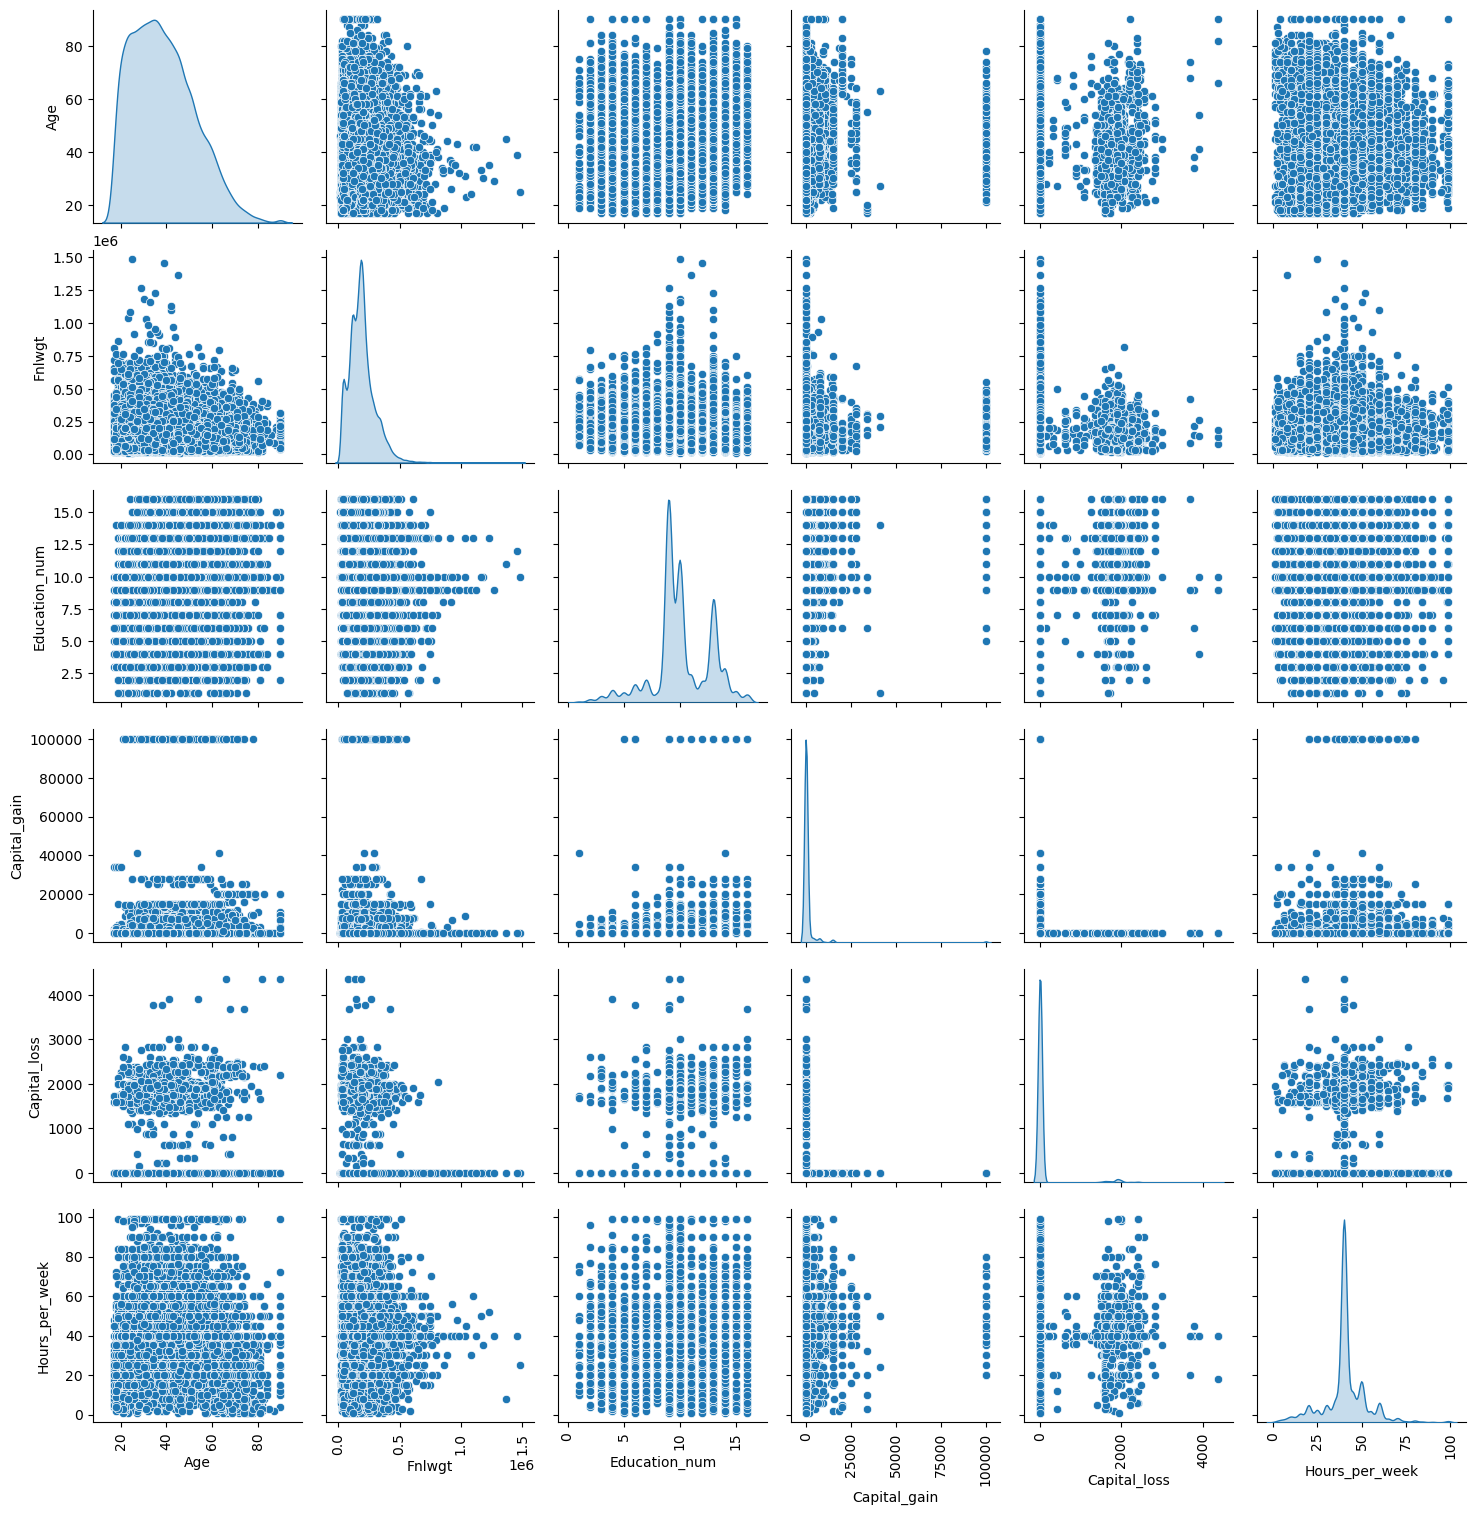

In [79]:
num_values = cencus.drop(['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
                      'Native_country', 'Income'], axis=1)
plt.style.use('default')
g = sns.pairplot(num_values, diag_kind="kde")
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

# Histogram

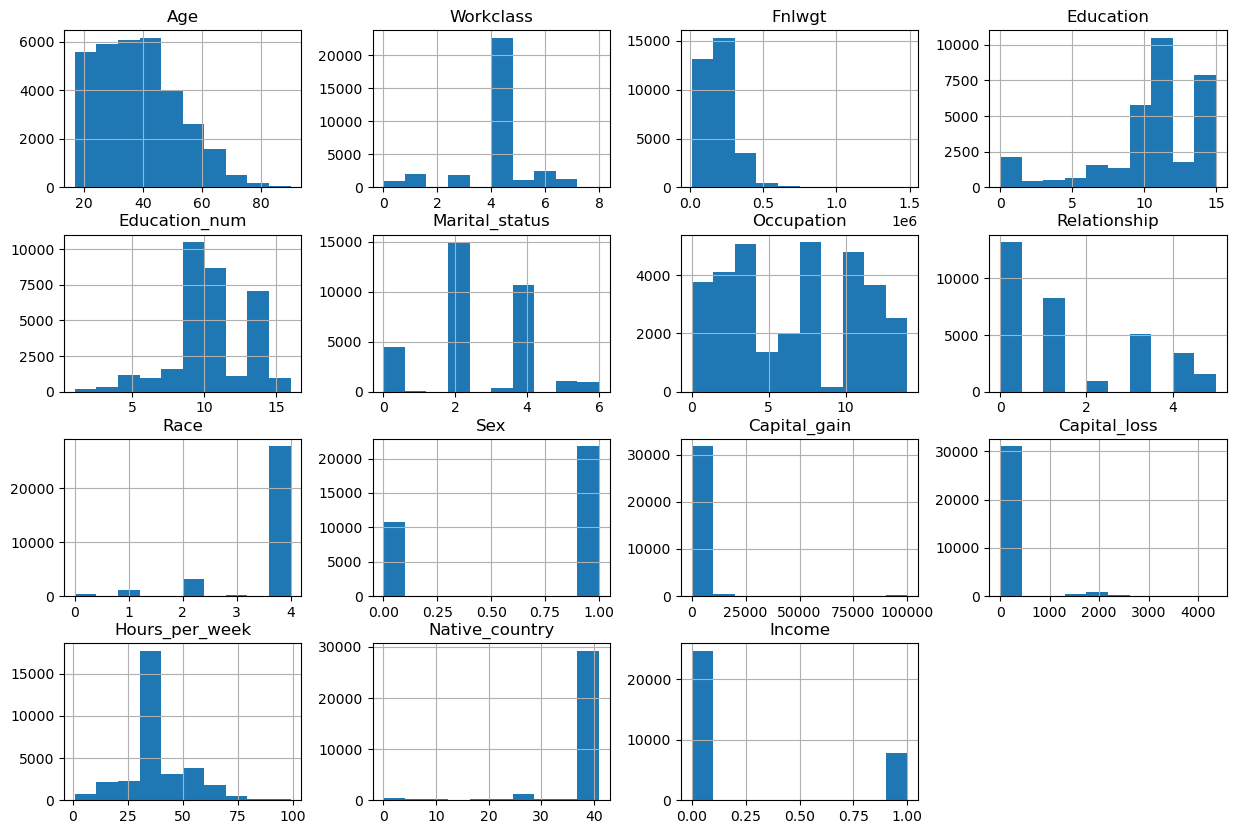

In [80]:
cencus.hist(figsize=(15,10))
plt.show()

- Hitogram has shown me all the graphs of columns after encoding them to numeric values.

# Correlation using Heatmap

In [81]:
cencus.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.008658,-0.076448,-0.010551,0.036224,-0.266142,-0.006211,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000199,0.234039
Workclass,0.008658,1.000000,-0.017959,0.000939,-0.009076,-0.021033,-0.000473,-0.060656,0.053442,0.076756,0.030576,0.000970,0.059954,-0.010064,0.002289
Fnlwgt,-0.076448,-0.017959,1.000000,-0.028065,-0.043353,0.028154,-0.000194,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.064337,-0.009521
Education,-0.010551,0.000939,-0.028065,1.000000,0.359105,-0.038413,-0.034530,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.077042,0.079361
Education_num,0.036224,-0.009076,-0.043353,0.359105,1.000000,-0.069196,0.091507,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.081568,0.335299
Marital_status,-0.266142,-0.021033,0.028154,-0.038413,-0.069196,1.000000,0.028040,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023431,-0.199187
Occupation,-0.006211,-0.000473,-0.000194,-0.034530,0.091507,0.028040,1.000000,-0.039937,-0.004093,0.043583,0.021137,0.011721,0.004395,-0.006413,0.045286
Relationship,-0.263744,-0.060656,0.008859,-0.011060,-0.094424,0.185542,-0.039937,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.009354,-0.250955
Race,0.029116,0.053442,-0.021484,0.014307,0.031998,-0.067942,-0.004093,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.131134,0.071855
Sex,0.088708,0.076756,0.027113,-0.027426,0.012181,-0.129425,0.043583,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.002381,0.215984


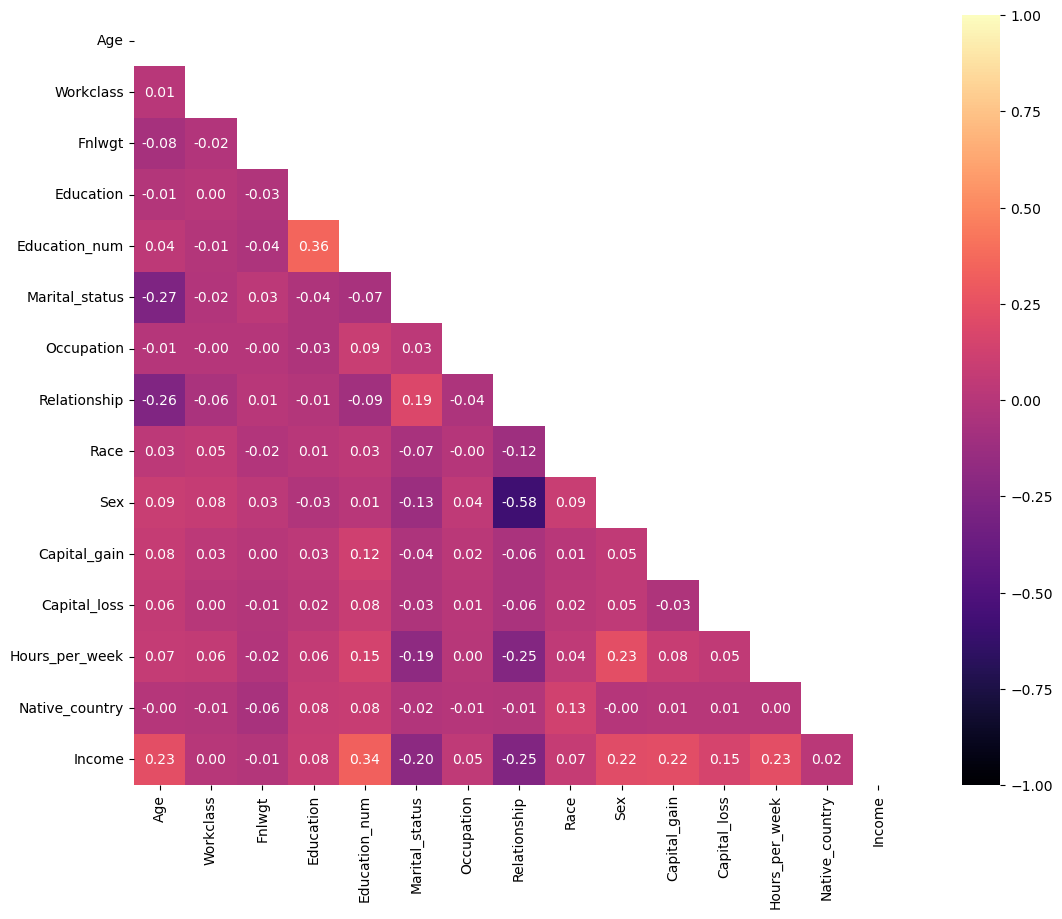

In [82]:
upper_triangle = np.triu(cencus.corr())
plt.figure(figsize=(15,10))
sns.heatmap(cencus.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.2f', 
            annot_kws={'size':10}, cmap="magma", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- Sex column is highly negatively related with column relationship.

- Also this heatmap shows us that there is no multicolinearity issue bewteen our columns.

# Comparison between target variable and other feature columns using Correlation Barplot:

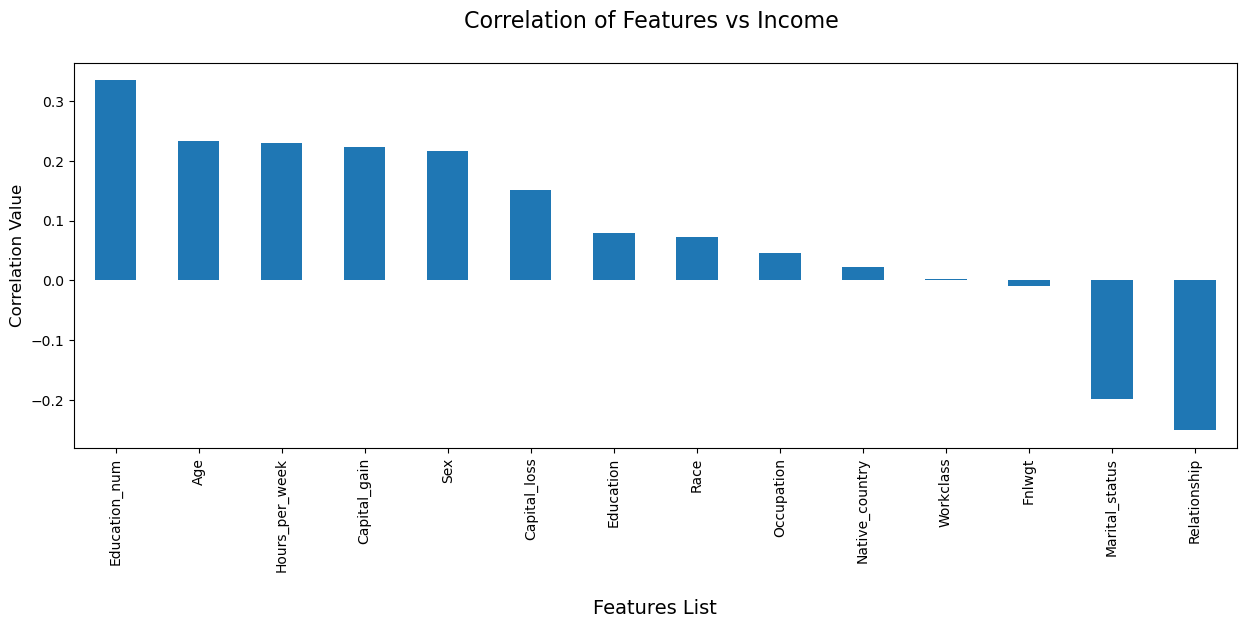

In [83]:
cencus_corr = cencus.corr()
plt.figure(figsize=(15,5))
cencus_corr['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.title("Correlation of Features vs Income \n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- We can observe that workclass & Fnlwgt are very less correlated with our target variable.

- Marital status & Relationship columns are only the columns which are negatively correlated with target variable, remaining all columns are positively correlated with our target variable.

In [84]:
# Let us check once again if outliers are present or not:
cencus.skew()

Age                0.557657
Workclass         -0.658999
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.089872
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.902282
Income             1.211640
dtype: float64

<AxesSubplot:>

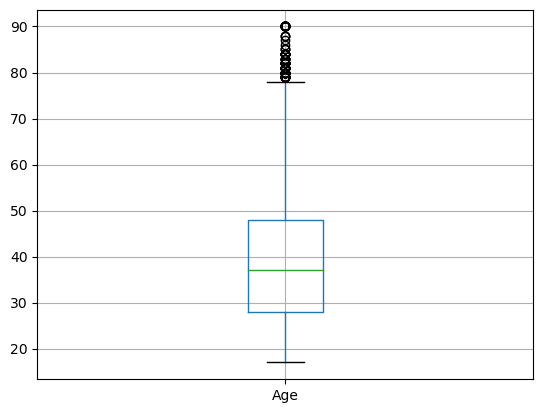

In [85]:
cencus.boxplot(['Age'])

- We can see that column 'Age' contains excessively high count of outliers.

<AxesSubplot:>

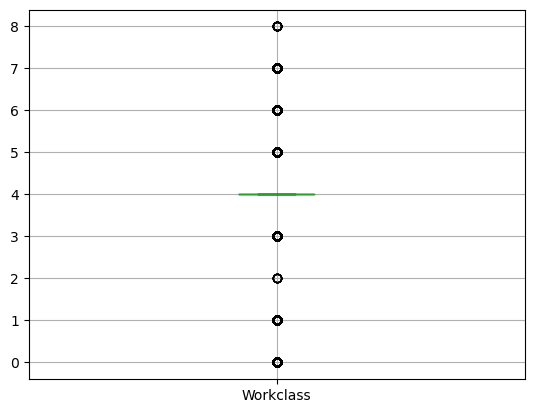

In [86]:
cencus.boxplot(['Workclass'])

- Column "Workclass" also contains outliers in high number.

<AxesSubplot:>

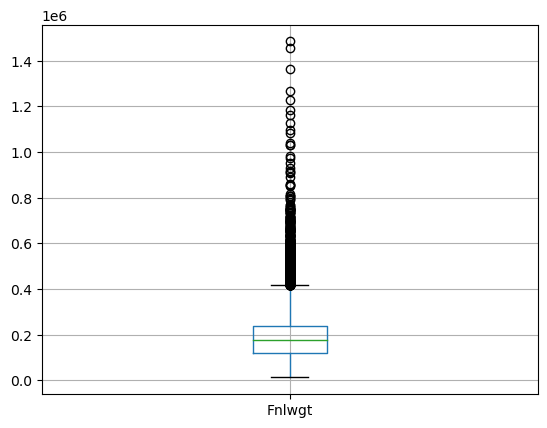

In [87]:
cencus.boxplot(['Fnlwgt'])

- The count of outliers is excessively high in case of column "Fnlwgt"

<AxesSubplot:>

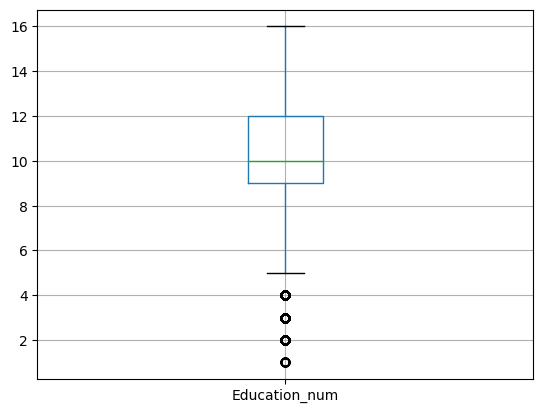

In [88]:
cencus.boxplot(['Education_num'])

- Few outliers are also present in column "education_num"

<AxesSubplot:>

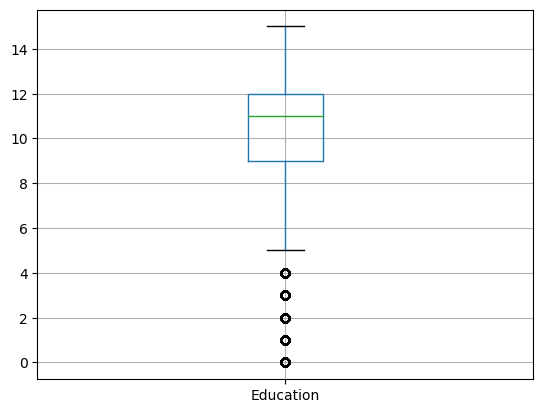

In [89]:
cencus.boxplot(['Education'])

- Column "education" also has few outliers.

<AxesSubplot:>

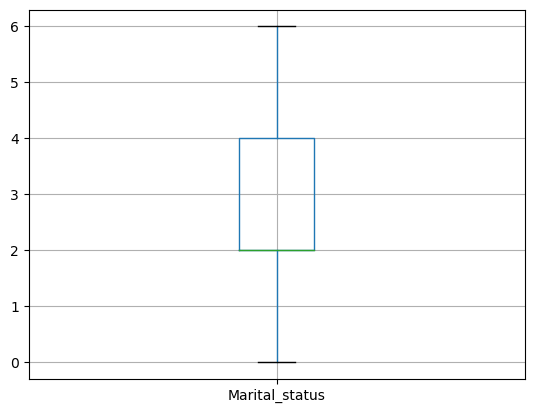

In [90]:
cencus.boxplot(['Marital_status'])

- No outliers are present in column "Marital_status"

<AxesSubplot:>

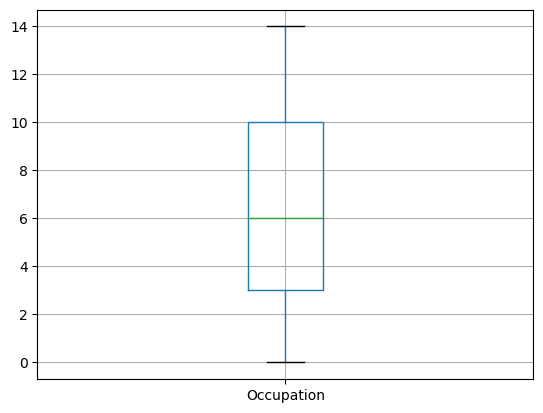

In [91]:
cencus.boxplot(['Occupation'])

- No outliers are present in column "Occupation"

<AxesSubplot:>

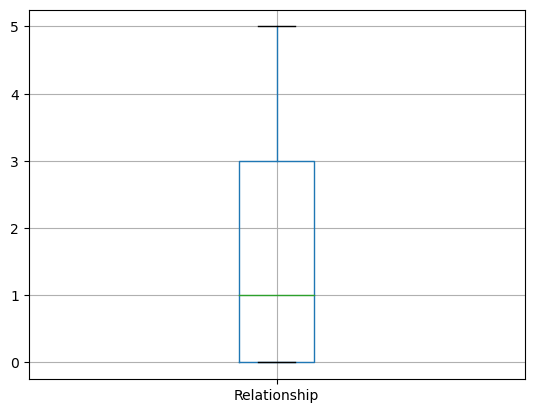

In [92]:
cencus.boxplot(['Relationship'])

- No outliers are present in column "Relationship"

<AxesSubplot:>

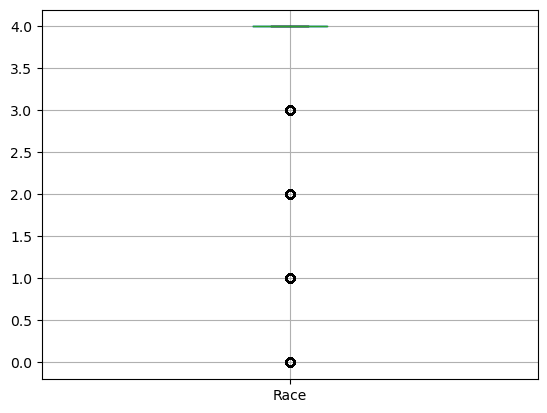

In [93]:
cencus.boxplot(['Race'])

- Few outliers are present in column "Race"

<AxesSubplot:>

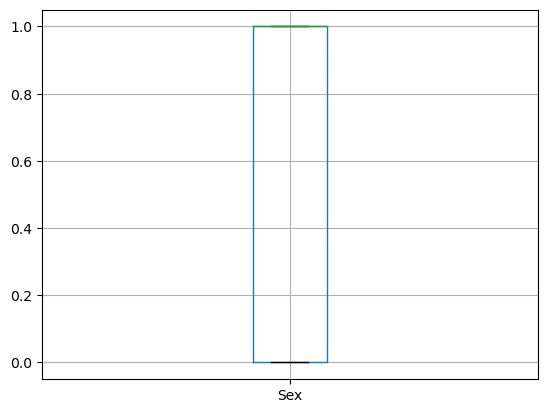

In [94]:
cencus.boxplot(['Sex'])

- No outliers are present in column "Sex"

<AxesSubplot:>

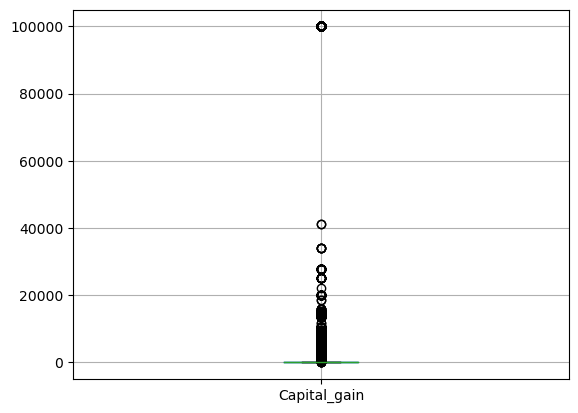

In [95]:
cencus.boxplot(['Capital_gain'])

- Huge amount of outliers are present in column "capital gain"

<AxesSubplot:>

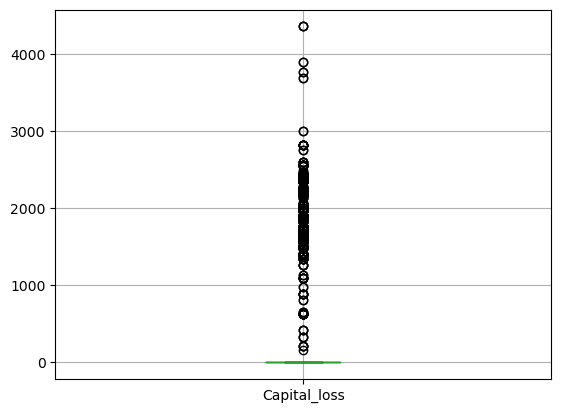

In [96]:
cencus.boxplot(['Capital_loss'])

- Excessively high amount of outliers are present in column "capital loss"

<AxesSubplot:>

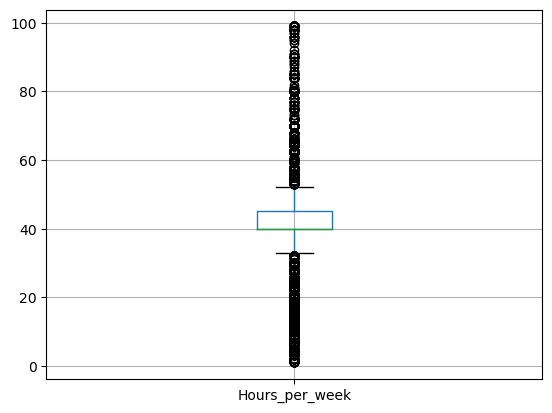

In [97]:
cencus.boxplot(['Hours_per_week'])

- The highest amount of outliers are present in column "Hours_per_week" which is affecting our dataset.

<AxesSubplot:>

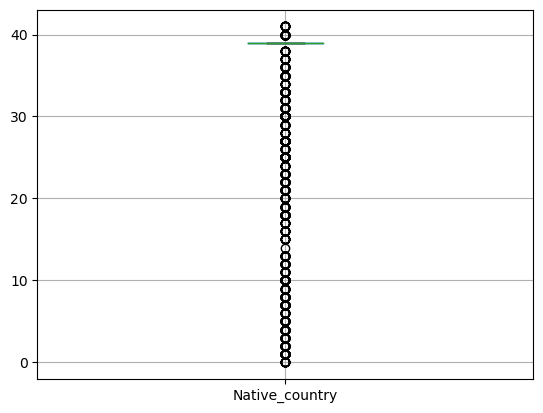

In [98]:
cencus.boxplot(['Native_country'])

- Native country also has high amount of outliers

<AxesSubplot:>

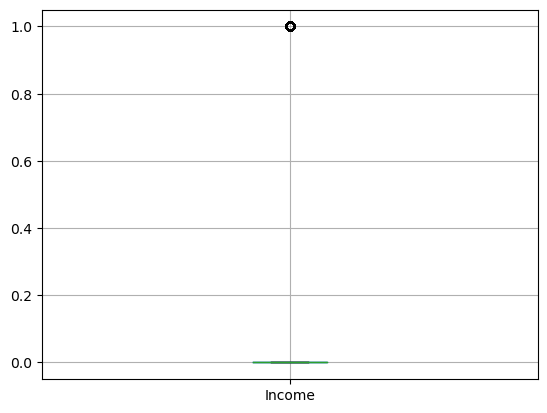

In [99]:
cencus.boxplot(['Income'])

- Income column has only 1 outlier, which we wont be removing.

# Using Z Score to remove outliers

In [100]:
z = np.abs(zscore(cencus))
threshold = 3
cen = cencus[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", cencus.shape)
print ("Shape of the dataframe after removing outliers: ", cen.shape)
print ("Percentage of data loss post outlier removal: ", (cencus.shape[0]-cen.shape[0])/cencus.shape[0]*100)

cencus=cen.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (32536, 15)
Shape of the dataframe after removing outliers:  (27763, 15)
Percentage of data loss post outlier removal:  14.669904106220802


- We can observe that our 14% data is been lost while removing the outliers.

In [101]:
# Let us again check the skewness after removing outliers

cencus.skew()

Age                0.484855
Workclass         -0.663507
Fnlwgt             0.629184
Education         -0.955853
Education_num     -0.145432
Marital_status    -0.045123
Occupation         0.101481
Relationship       0.753529
Race              -2.585947
Sex               -0.689396
Capital_gain       4.929937
Capital_loss      29.510814
Hours_per_week    -0.358912
Native_country    -4.368853
Income             1.321803
dtype: float64

# Lets use Log Transform to fix skewness

In [102]:
for column in numerical_datatype:
    if cencus.skew().loc[column]>0.55:
        cencus[column]=np.log1p(cencus[column])

##### I have used Log Transformation on our numerical integer datatype columns to ensure that we do not have skewness in our dataset.

In [103]:
cencus.skew()

Age                0.484855
Workclass         -0.663507
Fnlwgt            -0.955984
Education         -0.955853
Education_num     -0.145432
Marital_status    -0.045123
Occupation         0.101481
Relationship       0.753529
Race              -2.585947
Sex               -0.689396
Capital_gain       3.111123
Capital_loss      25.003969
Hours_per_week    -0.358912
Native_country    -4.368853
Income             1.321803
dtype: float64

# Splitting the dataset into 2 variables 'X' and 'Y' for feature and label.

In [104]:
X = cencus.drop('Income', axis=1)
Y = cencus['Income']

In [105]:
# Let us check and resolve the imbalance issue in our target variable

Y.value_counts()

0    21535
1     6228
Name: Income, dtype: int64

##### There is oversampling issue in our data, so let us use SMOTE and resolve the oversampling to make our data balanced.

In [106]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [107]:
# Now lets check Y 
Y.value_counts()

0    21535
1    21535
Name: Income, dtype: int64

- Now we can observe that our data is equally balanced.

# Feature Scaling

In [108]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.779610,1.548144,-1.145395,-0.431293,1.015070,-0.318531,-0.815406,-0.730858,0.307172,0.607725,-0.382995,-0.032796,-2.654816,0.213201
1,-0.170997,0.047907,0.523870,0.139295,-0.635843,-1.850517,-0.358139,-0.108460,0.307172,0.607725,-0.382995,-0.032796,-0.146707,0.213201
2,1.017262,0.047907,0.672638,-2.713645,-1.461299,-0.318531,-0.358139,-0.730858,-3.499524,0.607725,-0.382995,-0.032796,-0.146707,0.213201
3,-0.250214,0.047907,1.010726,0.424589,1.427798,-0.318531,-0.815406,2.381133,0.307172,-1.690610,-0.382995,-0.032796,-0.146707,0.213201
4,0.700393,0.047907,0.002064,-1.287175,-2.286755,0.447462,0.327763,-0.108460,-3.499524,-1.690610,-0.382995,-0.032796,-2.376137,-5.827103


# Finding best random state for building Classification Models

In [109]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 77.7648788793437 on Random State 466


# Machine Learning Model for Classification with Evaluation Metrics

In [110]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=725)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [111]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      5403
           1       0.77      0.80      0.78      5365

    accuracy                           0.78     10768
   macro avg       0.78      0.78      0.78     10768
weighted avg       0.78      0.78      0.78     10768

Accuracy Score: 77.66530460624071
Cross Validation Score: 76.65660552588808

Accuracy Score - Cross Validation Score is 1.0086990803526277


In [125]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      5403
           1       0.81      0.91      0.85      5365

    accuracy                           0.85     10768
   macro avg       0.85      0.85      0.85     10768
weighted avg       0.85      0.85      0.85     10768

Accuracy Score: 84.58395245170877
Cross Validation Score: 84.00278616206177

Accuracy Score - Cross Validation Score is 0.5811662896470011


In [126]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      5403
           1       0.85      0.88      0.87      5365

    accuracy                           0.86     10768
   macro avg       0.86      0.86      0.86     10768
weighted avg       0.86      0.86      0.86     10768

Accuracy Score: 86.26485884101041
Cross Validation Score: 86.23635941490598

Accuracy Score - Cross Validation Score is 0.02849942610443179


In [127]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      5403
           1       0.86      0.93      0.89      5365

    accuracy                           0.89     10768
   macro avg       0.89      0.89      0.89     10768
weighted avg       0.89      0.89      0.89     10768

Accuracy Score: 88.57726597325409
Cross Validation Score: 87.8709078244718

Accuracy Score - Cross Validation Score is 0.7063581487822859


In [128]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      5403
           1       0.80      0.90      0.85      5365

    accuracy                           0.84     10768
   macro avg       0.85      0.84      0.84     10768
weighted avg       0.85      0.84      0.84     10768

Accuracy Score: 84.13818722139673
Cross Validation Score: 83.66148130949617

Accuracy Score - Cross Validation Score is 0.47670591190056655


In [129]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5403
           1       0.89      0.92      0.90      5365

    accuracy                           0.90     10768
   macro avg       0.90      0.90      0.90     10768
weighted avg       0.90      0.90      0.90     10768

Accuracy Score: 90.36961367013373
Cross Validation Score: 90.21128395635014

Accuracy Score - Cross Validation Score is 0.15832971378358707


In [130]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5403
           1       0.89      0.91      0.90      5365

    accuracy                           0.90     10768
   macro avg       0.90      0.90      0.90     10768
weighted avg       0.90      0.90      0.90     10768

Accuracy Score: 89.88670133729569
Cross Validation Score: 88.89482238216854

Accuracy Score - Cross Validation Score is 0.9918789551271487


# Hyper parameter tuning

##### After checking the difference between accuracy score and cv score of all classification models, I have selected Extra Trees Classifier as my best model to do hyper parameter tuning.

In [135]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [0, -1, 1],
              'random_state' : [7, 777, 1000],
              'max_depth' : [0, 25, 50],
              'n_estimators' : [10, 20, 30]
             }

In [138]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=10)

In [139]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 25, 50], 'n_estimators': [10, 20, 30],
                         'n_jobs': [0, -1, 1], 'random_state': [7, 777, 1000]})

In [140]:
# Now lets get the results

print(GSCV.best_score_)
print(GSCV.best_estimator_)
print(GSCV.best_params_)

0.8972103869064322
ExtraTreesClassifier(criterion='entropy', max_depth=50, n_estimators=30,
                     n_jobs=-1, random_state=1000)
{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 1000}


In [141]:
Final_Model = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=300, n_jobs=-2, random_state=1000)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 89.69120037148828


##### I have successfully completed the Hyper Parameter Tuning on my Final Model and received the accuracy score as 89.69%.

# Plotting AUC - ROC Curve

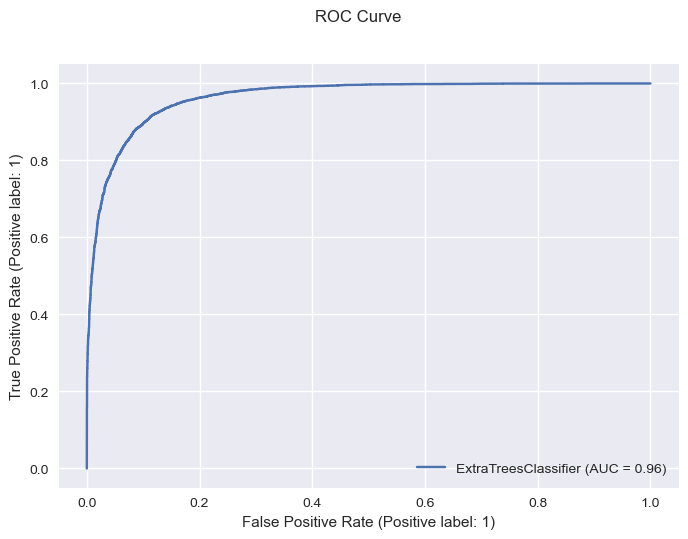

In [142]:
from sklearn import metrics
plt.style.use('seaborn')
d = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
d.figure_.suptitle("ROC Curve")
plt.show()

- AUC-ROC curve gives an accuracy score of 96%.

# Confusion Matrix

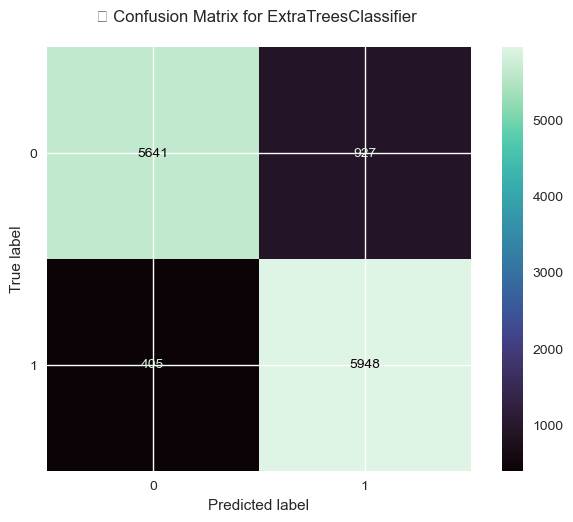

In [143]:
class_names = cencus.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for ExtraTreesClassifier \n')
plt.show()

- By confusion matrix we are able to understand that how accurate and no.of correct outputs our ML model has given us, also it has predicted incorrect no. of outputs.

# Saving the model

In [144]:
filename = "Final_CencusIncome_Model.pkl"
joblib.dump(Final_Model, filename)

['Final_CencusIncome_Model.pkl']

##### Finally we have saved our best ML model with filename as "Final_CencusIncome_Model" with accuracy of 89%.